In [60]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
temp1 = df[["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
temp1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [64]:
label_encoder = preprocessing.LabelEncoder()
temp1["Genre"] = label_encoder.fit_transform(temp1["Genre"])
temp1["Genre"].unique()

/tmp/ipykernel_8327/1659668816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1["Genre"] = label_encoder.fit_transform(temp1["Genre"])


array([1, 0])

In [65]:
cluster = []
for k in range(1, 11):
    kmean = KMeans(n_clusters=k).fit(temp1)
    cluster.append(kmean.inertia_)

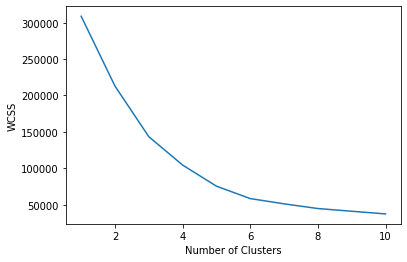

In [66]:
plt.plot(range(1, 11), cluster)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

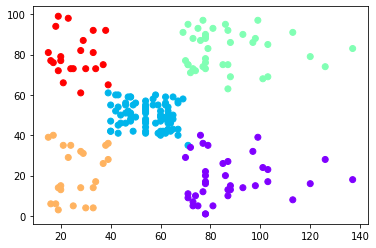

In [67]:
kmean = KMeans(n_clusters=5)
kmean.fit(temp1)
identified_clusters = kmean.fit_predict(temp1)
temp1['Predicted Value'] = identified_clusters
plt.scatter(x=temp1["Annual Income (k$)"],y=temp1['Spending Score (1-100)'],c=temp1['Predicted Value'],cmap='rainbow')

In [68]:
temp2 = pd.DataFrame()
temp2['Annual Income (k$)'] = df['Annual Income (k$)']
temp2['Spending Score (1-100)'] = df['Spending Score (1-100)']

In [69]:
cluster = [] 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters =k)
    kmeans.fit(temp2) 
    cluster.append(kmeans.inertia_)

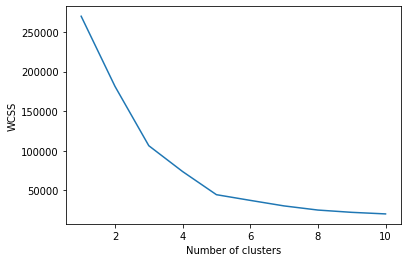

In [70]:
plt.plot(range(1, 11), cluster)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

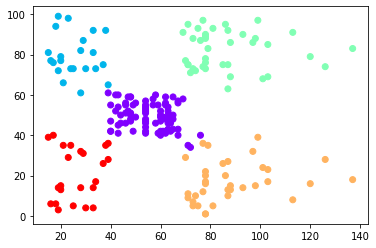

In [71]:
kmean=KMeans(n_clusters=5)
kmean.fit(temp2)
identified_clusters = kmean.fit_predict(temp2)
temp2["Predicted Value"] = identified_clusters
plt.scatter(x=temp2["Annual Income (k$)"],y=temp2['Spending Score (1-100)'],c=temp2['Predicted Value'],cmap='rainbow')